In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(889, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [6]:
df.shape

(889, 11)

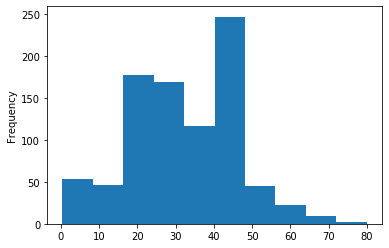

In [7]:
df['Age'].plot.hist()

 - as Curve is Bell Shaped , so fill the missing values by Mean

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

  - Embarked column is categorical so calculating the mode and filling it

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We observe that max people are from S-southampton so we fill all with S

In [10]:
df["Embarked"].fillna(value='S',inplace=True)

 - Now checking missing values

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

 - We observe that all missing values are filled now

## Lets Drop Irrelevent columns
 - As the name column contain different name and the survival is not relevant to names
 - passenger Id does not make any sense
 - Ticket number doesnt provide any relevant information whether they survived or not so drop it

In [13]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


##  Changing Text data to Categorical

In [15]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## K-Nearest Neighbour

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [20]:
def prediction(n):
    x = df.drop(['Pclass'],axis=1)
    y = df['Pclass']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
    
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 268
Here k value is 1: 

Acuuracy when k is 1  0.8913857677902621
Confusion matrix when k is 1  
 [[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
Here k value is 2: 

Acuuracy when k is 2  0.8651685393258427
Confusion matrix when k is 2  
 [[ 67   2   1]
 [  8  37   4]
 [  4  17 127]]
Here k value is 3: 

Acuuracy when k is 3  0.8651685393258427
Confusion matrix when k is 3  
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]
Here k value is 4: 

Acuuracy when k is 4  0.8239700374531835
Confusion matrix when k is 4  
 [[ 61   7   2]
 [  8  30  11]
 [  4  15 129]]
Here k value is 5: 

Acuuracy when k is 5  0.8314606741573034
Confusion matrix when k is 5  
 [[ 58  10   2]
 [  7  28  14]
 [  3   9 136]]
Here k value is 6: 

Acuuracy when k is 6  0.846441947565543
Confusion matrix when k is 6  
 [[ 64   5   1]
 [  7  32  10]
 [  3  15 130]]
Here k value is 7: 

Acuuracy when k is 7  0.8426966292134831
Confusion matrix when k is 7  
 [[ 59  10   1]
 [


Acuuracy when k is 66  0.7565543071161048
Confusion matrix when k is 66  
 [[ 57   6   7]
 [  5  11  33]
 [  5   9 134]]
Here k value is 67: 

Acuuracy when k is 67  0.7602996254681648
Confusion matrix when k is 67  
 [[ 57   6   7]
 [  5  11  33]
 [  5   8 135]]
Here k value is 68: 

Acuuracy when k is 68  0.7602996254681648
Confusion matrix when k is 68  
 [[ 57   6   7]
 [  5  11  33]
 [  5   8 135]]
Here k value is 69: 

Acuuracy when k is 69  0.7640449438202247
Confusion matrix when k is 69  
 [[ 56   7   7]
 [  5  11  33]
 [  5   6 137]]
Here k value is 70: 

Acuuracy when k is 70  0.7640449438202247
Confusion matrix when k is 70  
 [[ 57   6   7]
 [  5  11  33]
 [  5   7 136]]
Here k value is 71: 

Acuuracy when k is 71  0.7640449438202247
Confusion matrix when k is 71  
 [[ 57   6   7]
 [  5  11  33]
 [  5   7 136]]
Here k value is 72: 

Acuuracy when k is 72  0.7565543071161048
Confusion matrix when k is 72  
 [[ 56   7   7]
 [  5  11  33]
 [  5   8 135]]
Here k value is 73: 

Confusion matrix when k is 127  
 [[ 53  12   5]
 [  5  11  33]
 [  5   7 136]]
Here k value is 128: 

Acuuracy when k is 128  0.7528089887640449
Confusion matrix when k is 128  
 [[ 53  12   5]
 [  5  11  33]
 [  5   6 137]]
Here k value is 129: 

Acuuracy when k is 129  0.7528089887640449
Confusion matrix when k is 129  
 [[ 53  12   5]
 [  5  11  33]
 [  5   6 137]]
Here k value is 130: 

Acuuracy when k is 130  0.7602996254681648
Confusion matrix when k is 130  
 [[ 53  12   5]
 [  5  11  33]
 [  5   4 139]]
Here k value is 131: 

Acuuracy when k is 131  0.7602996254681648
Confusion matrix when k is 131  
 [[ 53  12   5]
 [  5  11  33]
 [  5   4 139]]
Here k value is 132: 

Acuuracy when k is 132  0.7602996254681648
Confusion matrix when k is 132  
 [[ 53  13   4]
 [  5  11  33]
 [  5   4 139]]
Here k value is 133: 

Acuuracy when k is 133  0.7602996254681648
Confusion matrix when k is 133  
 [[ 53  13   4]
 [  5  11  33]
 [  5   4 139]]
Here k value is 134: 

Acuuracy when k is 13


Acuuracy when k is 188  0.7490636704119851
Confusion matrix when k is 188  
 [[ 51   5  14]
 [  5   6  38]
 [  5   0 143]]
Here k value is 189: 

Acuuracy when k is 189  0.7453183520599251
Confusion matrix when k is 189  
 [[ 50   5  15]
 [  5   6  38]
 [  5   0 143]]
Here k value is 190: 

Acuuracy when k is 190  0.7415730337078652
Confusion matrix when k is 190  
 [[ 50   5  15]
 [  5   5  39]
 [  5   0 143]]
Here k value is 191: 

Acuuracy when k is 191  0.7415730337078652
Confusion matrix when k is 191  
 [[ 50   5  15]
 [  5   5  39]
 [  5   0 143]]
Here k value is 192: 

Acuuracy when k is 192  0.7415730337078652
Confusion matrix when k is 192  
 [[ 50   5  15]
 [  5   5  39]
 [  5   0 143]]
Here k value is 193: 

Acuuracy when k is 193  0.7415730337078652
Confusion matrix when k is 193  
 [[ 50   5  15]
 [  5   5  39]
 [  5   0 143]]
Here k value is 194: 

Acuuracy when k is 194  0.7303370786516854
Confusion matrix when k is 194  
 [[ 48   7  15]
 [  5   4  40]
 [  5   0 143]]



Acuuracy when k is 250  0.7191011235955056
Confusion matrix when k is 250  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
Here k value is 251: 

Acuuracy when k is 251  0.7191011235955056
Confusion matrix when k is 251  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
Here k value is 252: 

Acuuracy when k is 252  0.7191011235955056
Confusion matrix when k is 252  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
Here k value is 253: 

Acuuracy when k is 253  0.7191011235955056
Confusion matrix when k is 253  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
Here k value is 254: 

Acuuracy when k is 254  0.7191011235955056
Confusion matrix when k is 254  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
Here k value is 255: 

Acuuracy when k is 255  0.7191011235955056
Confusion matrix when k is 255  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
Here k value is 256: 

Acuuracy when k is 256  0.7191011235955056
Confusion matrix when k is 256  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]


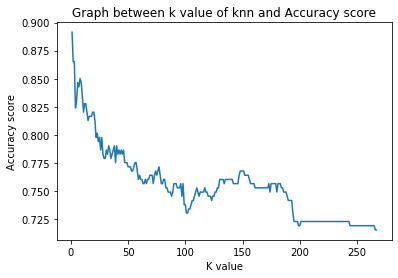

In [21]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)